# Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format 

__Some attributes from the dataset__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [2]:

df = pd.read_csv("../dataset/movies_complete.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [3]:
df[:2]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston


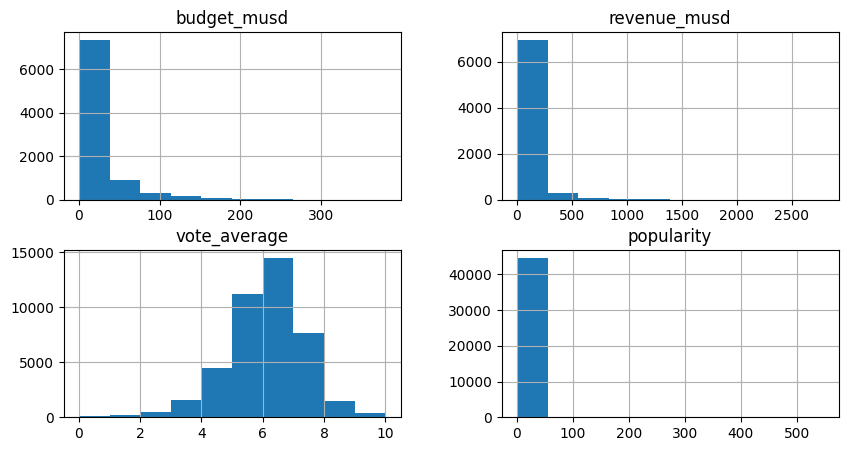

In [4]:
df.hist(column=['budget_musd', 'revenue_musd', 'vote_average', 'popularity'], figsize=(10, 5))
plt.show()

- Check the most common movie genres

Drama                   4935
Comedy                  3581
Documentary             2670
Drama|Romance           1291
Comedy|Drama            1125
Horror                   962
Comedy|Romance           921
Comedy|Drama|Romance     591
Drama|Comedy             528
Horror|Thriller          527
Name: genres, dtype: int64


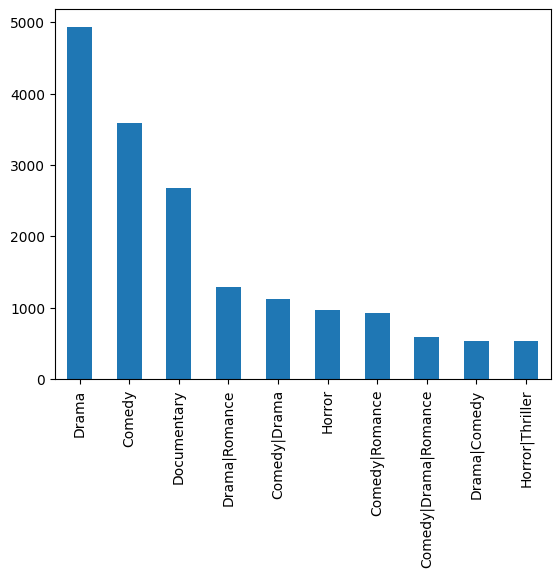

In [5]:
print(df.genres.value_counts().head(10))

df.genres.value_counts().head(10).plot(kind='bar')
plt.show()

- Check the most common movie title

Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Beauty and the Beast     8
Les Misérables           8
The Three Musketeers     7
A Christmas Carol        7
Treasure Island          7
Home                     6
Jane Eyre                6
Name: title, dtype: int64


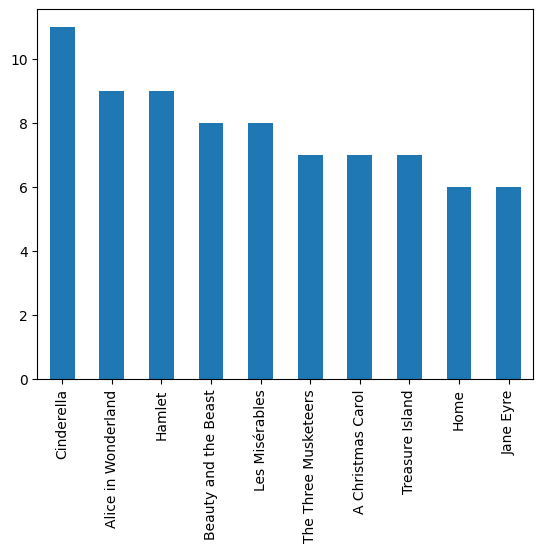

In [6]:
print(df.title.value_counts().head(10))

df.title.value_counts().head(10).plot(kind='bar')
plt.show()

## The best and the worst movies...

__Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 50 or more Ratings)
- Lowest Rating (only movies with 50 or more Ratings)
- Highest Popularity

__Create a new DataFrame to get all the data that is gonna be useful to us__

        Use HTML object to show movie's poster picture

In [7]:
df_best = df[['title', 'poster_path', 'budget_musd', 'revenue_musd', 'vote_count', 'vote_average', 'popularity']].copy()

df_firstFive = df_best.head()
HTML(df_firstFive.to_html(escape=False))

,title,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,Toy Story,,30.00,373.55,5415.00,7.70,21.95
1,Jumanji,,65.00,262.80,2413.00,6.90,17.02
2,Grumpier Old Men,,NaN,NaN,92.00,6.50,11.71
3,Waiting to Exhale,,16.00,81.45,34.00,6.10,3.86
4,Father of the Bride Part II,,NaN,76.58,173.00,5.70,8.39


__Movies Top 5 - Highest Revenue__

In [8]:
df_highestRevenue = df_best.sort_values(by='revenue_musd', ascending=False)[:5].set_index('title')
HTML(df_highestRevenue.to_html(escape=False))

,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity
title,,,,,,
Avatar,,237.00,2787.97,12114.00,7.20,185.07
Star Wars: The Force Awakens,,245.00,2068.22,7993.00,7.50,31.63
Titanic,,200.00,1845.03,7770.00,7.50,26.89
The Avengers,,220.00,1519.56,12000.00,7.40,89.89
Jurassic World,,150.00,1513.53,8842.00,6.50,32.79


__Movies Top 5 - Highest Budget__

In [9]:
df_highestBudget = df_best.sort_values(by='budget_musd', ascending=False)[:5].set_index('title')
HTML(df_highestBudget.to_html(escape=False))

,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity
title,,,,,,
Pirates of the Caribbean: On Stranger Tides,,380.00,1045.71,5068.00,6.40,27.89
Pirates of the Caribbean: At World's End,,300.00,961.00,4627.00,6.90,31.36
Avengers: Age of Ultron,,280.00,1405.40,6908.00,7.30,37.38
Superman Returns,,270.00,391.08,1429.00,5.40,13.28
John Carter,,260.00,284.14,2170.00,6.10,14.67


__Movies Top 5 - Highest Profit__

In [10]:
df_best['profit_musd'] = df_best['revenue_musd'] - df_best['budget_musd']

df_highestProfit = df_best.sort_values(by='profit_musd', ascending=False)[:5].set_index('title')
HTML(df_highestProfit.to_html(escape=False))

,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd
title,,,,,,,
Avatar,,237.00,2787.97,12114.00,7.20,185.07,2550.97
Star Wars: The Force Awakens,,245.00,2068.22,7993.00,7.50,31.63,1823.22
Titanic,,200.00,1845.03,7770.00,7.50,26.89,1645.03
Jurassic World,,150.00,1513.53,8842.00,6.50,32.79,1363.53
Furious 7,,190.00,1506.25,4253.00,7.30,27.28,1316.25


__Movies Top 5 - Lowest Profit__

In [11]:
df_lowestProfit = df_best.sort_values(by='profit_musd', ascending=True)[:5].set_index('title')
HTML(df_lowestProfit.to_html(escape=False))

,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd
title,,,,,,,
The Lone Ranger,,255.00,89.29,2361.00,5.90,12.73,-165.71
The Alamo,,145.00,25.82,108.00,5.80,12.24,-119.18
Mars Needs Moms,,150.00,38.99,202.00,5.60,7.25,-111.01
Valerian and the City of a Thousand Planets,,197.47,90.02,905.00,6.70,15.26,-107.45
The 13th Warrior,,160.00,61.70,524.00,6.40,10.31,-98.30


__Movies Top 5 - Highest ROI__

In [12]:
df_best['ROI'] = df_best['revenue_musd'] / df_best['budget_musd']

df_highestROI = df_best.sort_values(by='ROI', ascending=False)[df_best.budget_musd >= 10][:5].set_index('title')
HTML(df_highestROI.to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_16804\1016964914.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_highestROI = df_best.sort_values(by='ROI', ascending=False)[df_best.budget_musd >= 10][:5].set_index('title')


,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
title,,,,,,,,
E.T. the Extra-Terrestrial,,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
Star Wars,,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Pretty Woman,,14.00,463.00,1807.00,7.00,13.35,449.00,33.07
The Intouchables,,13.00,426.48,5410.00,8.20,16.09,413.48,32.81
The Empire Strikes Back,,18.00,538.40,5998.00,8.20,19.47,520.40,29.91


__Movies Top 5 - Lowest ROI__

In [13]:
df_lowestROI = df_best.sort_values(by='ROI', ascending=True)[df_best.budget_musd >= 10][:5].set_index('title')
HTML(df_lowestROI.to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_16804\1328016330.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_lowestROI = df_best.sort_values(by='ROI', ascending=True)[df_best.budget_musd >= 10][:5].set_index('title')


,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
title,,,,,,,,
Chasing Liberty,,23.00,0.00,154.00,6.10,5.95,-23.00,0.00
The Cookout,,16.00,0.00,10.00,4.60,1.76,-16.00,0.00
Deadfall,,10.00,0.00,14.00,3.10,1.15,-10.00,0.00
In the Cut,,12.00,0.00,93.00,4.70,5.80,-12.00,0.00
The Samaritan,,12.00,0.00,69.00,5.20,11.52,-12.00,0.00


__Movies Top 5 - Most Votes__

In [14]:
df_mostVotes = df_best.sort_values(by='vote_count', ascending=False)[:5].set_index('title')
HTML(df_mostVotes.to_html(escape=False))

,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
title,,,,,,,,
Inception,,160.00,825.53,14075.00,8.10,29.11,665.53,5.16
The Dark Knight,,185.00,1004.56,12269.00,8.30,123.17,819.56,5.43
Avatar,,237.00,2787.97,12114.00,7.20,185.07,2550.97,11.76
The Avengers,,220.00,1519.56,12000.00,7.40,89.89,1299.56,6.91
Deadpool,,58.00,783.11,11444.00,7.40,187.86,725.11,13.50


__Movies Top 5 - Highest Rating__

In [15]:
df_highestRating = df_best.sort_values(by='vote_average', ascending=False)[df_best.vote_count>=50][:5].set_index('title')
HTML(df_highestRating.to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_16804\4081753877.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_highestRating = df_best.sort_values(by='vote_average', ascending=False)[df_best.vote_count>=50][:5].set_index('title')


,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
title,,,,,,,,
Planet Earth II,,NaN,NaN,50.00,9.50,5.65,NaN,NaN
Dilwale Dulhania Le Jayenge,,13.20,100.00,661.00,9.10,34.46,86.80,7.58
Planet Earth,,NaN,NaN,176.00,8.80,4.50,NaN,NaN
Sansho the Bailiff,,NaN,NaN,68.00,8.70,5.10,NaN,NaN
The Jinx: The Life and Deaths of Robert Durst,,NaN,NaN,85.00,8.60,5.40,NaN,NaN


__Movies Top 5 - Lowest Rating__

In [16]:
df_lowestRating = df_best.sort_values(by='vote_average', ascending=True)[df_best.vote_count>=50][:5].set_index('title')
HTML(df_lowestRating.to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_16804\662696111.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_lowestRating = df_best.sort_values(by='vote_average', ascending=True)[df_best.vote_count>=50][:5].set_index('title')


,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
title,,,,,,,,
Manos: The Hands of Fate,,0.02,NaN,56.00,2.00,2.56,NaN,NaN
Birdemic: Shock and Terror,,NaN,NaN,69.00,2.10,2.53,NaN,NaN
House of the Dead,,7.00,13.82,106.00,2.80,5.70,6.82,1.97
Back in the Day,,NaN,NaN,97.00,2.80,6.73,NaN,NaN
An Eye for Beauty,,NaN,0.04,54.00,2.90,3.41,NaN,NaN


__Movies Top 5 - Most Popular__

In [17]:
df_mostPopular = df_best.sort_values(by='popularity', ascending=False)[:5].set_index('title')
HTML(df_mostPopular.to_html(escape=False))

,poster_path,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
title,,,,,,,,
Minions,,74.00,1156.73,4729.00,6.40,547.49,1082.73,15.63
Wonder Woman,,149.00,820.58,5025.00,7.20,294.34,671.58,5.51
Beauty and the Beast,,160.00,1262.89,5530.00,6.80,287.25,1102.89,7.89
Baby Driver,,34.00,224.51,2083.00,7.20,228.03,190.51,6.60
Big Hero 6,,165.00,652.11,6289.00,7.80,213.85,487.11,3.95


## Find your next Movie

__Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [18]:
# Generate a Series with boolean value if the movie is an action or a Science Fiction movie
series_genres = df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')
# Generate a Series with a boolean value if the movie has Bruce Willis as actor
series_actor = df.cast.str.contains('Bruce Willis')

df_search_01 = df.loc[series_genres & series_actor, ['title', 'poster_path', 'vote_average']].sort_values(by='vote_average', ascending=False).set_index('title')
HTML(df_search_01.to_html(escape=False))

,poster_path,vote_average
title,,
The Fifth Element,,7.30
Looper,,6.60
Armageddon,,6.50
Surrogates,,5.90
G.I. Joe: Retaliation,,5.40
Vice,,4.10


__Search 2: Movies with Uma Thurman as actor and directed by Quentin Tarantino (sorted from short to long runtime)__

In [19]:
# Generate a series with Boolean value if the movie is directed by Quentin Tarantino
series_director = df.director.str.contains('Quentin Tarantino')
# Generate a series with Boolean value if the movie has Uma Thurman as actor
series_actor = df.cast.str.contains('Uma Thurman')

df_search_02 = df.loc[series_director & series_actor, ['title', 'poster_path', 'runtime']].sort_values(by='runtime', ascending=True).set_index('title')
HTML(df_search_02.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.00
Kill Bill: Vol. 2,,136.00
Pulp Fiction,,154.00


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [20]:
# Generate a series with Boolean value if the movie is produced by Pixar Animation Studios
series_studio = df.production_companies.str.contains('Pixar Animation Studios')
# Generate a series with Boolean value if the movie was released between 2010 and 2015
series_releaseYear = df.release_date.between('2010-01-01', '2015-12-31')

df_search_03 = df.loc[series_studio & series_releaseYear, ['title', 'poster_path', 'production_companies', 'revenue_musd']].sort_values(by='revenue_musd', ascending=False)[:5].set_index('title')
HTML(df_search_03.to_html(escape=False))

,poster_path,production_companies,revenue_musd
title,,,
Toy Story 3,,Walt Disney Pictures|Pixar Animation Studios,1066.97
Inside Out,,Walt Disney Pictures|Pixar Animation Studios,857.61
Monsters University,,Walt Disney Pictures|Pixar Animation Studios,743.56
Cars 2,,Walt Disney Pictures|Pixar Animation Studios,559.85
Brave,,Walt Disney Pictures|Pixar Animation Studios,538.98


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [21]:
# Generate a series with Boolean value if it is a action or thriller movie
series_genres = df.genres.str.contains('Action') & df.genres.str.contains('Thriller')
# Genrate a series with Boolean value if the movie's original language is English
series_language = df.original_language == 'en'

df_search_04 = df.loc[series_genres & series_language, ['title', 'poster_path', 'vote_average', 'release_date']][df.vote_average >= 7.5].sort_values(by='release_date', ascending=True)[:5].set_index('title')
HTML(df_search_04.to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_16804\1998726036.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_search_04 = df.loc[series_genres & series_language, ['title', 'poster_path', 'vote_average', 'release_date']][df.vote_average >= 7.5].sort_values(by='release_date', ascending=True)[:5].set_index('title')


,poster_path,vote_average,release_date
title,,,
Scarface,,7.50,1932-04-09
To Have and Have Not,,7.60,1944-10-11
The Asphalt Jungle,,7.50,1950-05-22
The Killing,,7.70,1956-05-08
The Valley of Gwangi,,7.50,1969-07-24


## Are Franchises more successful?

__Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [22]:
# Coloumn that indicates if the movie is a franchise
df["Franchise"] = df.belongs_to_collection.notnull()
print(df.Franchise.head())

print()

# Count the number of movies that are part of a franchise
print("Number of movies that are part of a franchise:")
print(df.Franchise.value_counts())

0     True
1    False
2     True
3    False
4     True
Name: Franchise, dtype: bool

Number of movies that are part of a franchise:
False    40228
True      4463
Name: Franchise, dtype: int64


__Franchise vs. Stand-alone: Average Revenue__

In [23]:
df.groupby('Franchise').revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [24]:
df["ROI"] = df.revenue_musd / df.budget_musd

df.groupby('Franchise').ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [25]:
df.groupby('Franchise').budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [26]:
df.groupby('Franchise').popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [27]:
df.groupby('Franchise').vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

__Results__

In [28]:
df.groupby('Franchise').agg({'vote_average': 'mean', 'popularity': 'mean', 'budget_musd': 'mean', 'ROI': 'median', 'revenue_musd': 'mean'})

,vote_average,popularity,budget_musd,ROI,revenue_musd
Franchise,,,,,
False,6.01,2.59,18.05,1.62,44.74
True,5.96,6.25,38.32,3.71,165.71
